In [1]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from time import time
from keras_visualizer import visualizer 
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [2]:
mnist_dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

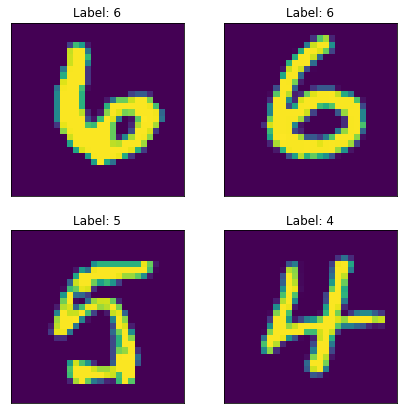

In [3]:

j=np.random.randint(0,len(x_train))
fig=plt.figure(figsize=[7,7])
for n in range(4):
  
  i=np.random.randint(0,len(x_train))
  ax=plt.subplot(2,2,n+1)
  ax.imshow(x_train[i])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title("Label: {}".format(y_train[i]))


In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
np.max(x_train[1].reshape([-1]))

255

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t1=time()

In [9]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2501 - accuracy: 0.9293 - val_loss: 0.1306 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1072 - accuracy: 0.9679 - val_loss: 0.0959 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0741 - accuracy: 0.9774 - val_loss: 0.0868 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0750 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0757 - val_acc

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.


In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


In [11]:
del model
x_test=np.reshape(x_test,(-1,28,28,1))
x_train=np.reshape(x_train,(-1,28,28,1))

# CNN Model

In [12]:
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Dropout(0.2))
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dense(10))
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

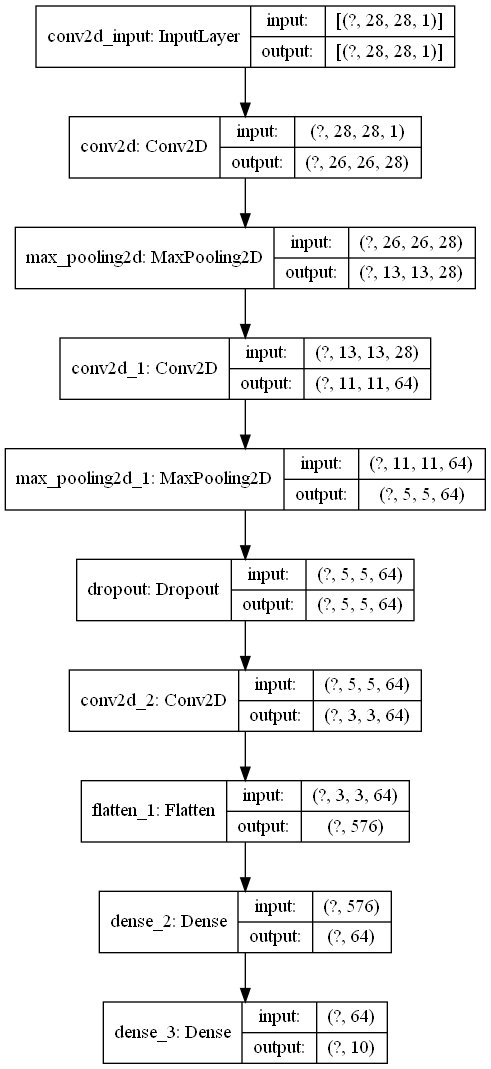

In [13]:
tf.keras.utils.plot_model(model_cnn, to_file="ali.png", show_shapes=True)

In [14]:
!pip install graphviz

In [29]:
visualizer(model_cnn, format='png', view=False, filename='graph')
!del graph

In [31]:
model_cnn.save("model_cnn.keras")

In [16]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(x_train, y_train, epochs=4, 
                    validation_data=(x_test, y_test))

Epoch 1/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1534 - accuracy: 0.9521 - val_loss: 0.0393 - val_accuracy: 0.9879
Epoch 2/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 3/4
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 4/4
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0271 - val_accuracy: 0.9912


In [17]:
test_loss, test_acc = model_cnn.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0271 - accuracy: 0.9912
0.9911999702453613


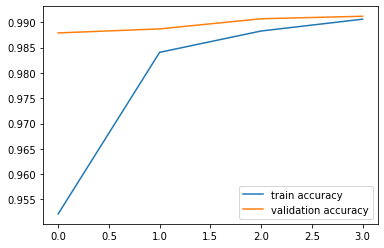

In [18]:

plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.legend()

In [19]:
import tensorflow as tf
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [20]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [21]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [22]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
tf.test.is_gpu_available(
  cuda_only=False, min_cuda_compute_capability=None
)

True

In [25]:
t2=time()
print(t2-t1)

216.62270617485046


83.5430631637573